#Importing required Modules

In [58]:
import numpy as np
import gdown as gd
import numpy.linalg as LA
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import cm

#Question 1: Training a Artificial Neural Network

We first get the required dataset into a pandas DataFrame.

In [59]:
training_data_df=pd.read_csv(gd.download(f"https://drive.google.com/uc?id=1bytEsIzXkJ3ZOd6mv6VJkc-WX06YBSks","data_Q1.csv",quiet=False))

Downloading...
From: https://drive.google.com/uc?id=1bytEsIzXkJ3ZOd6mv6VJkc-WX06YBSks
To: /content/data_Q1.csv
100%|██████████| 8.47k/8.47k [00:00<00:00, 13.7MB/s]


Now we have the data set into a pandas DataFrame. We have converted each column into seperate arrays using `.to_numpy` function. We have done this for further use in the Question.

In [60]:
training_x1=training_data_df.iloc[:,0].to_numpy()
training_x2=training_data_df.iloc[:,1].to_numpy()
training_y=training_data_df.iloc[:,2].to_numpy().reshape(-1,1)

N=len(training_y)
training_x=np.array([[x1,x2,1] for x1,x2 in zip(training_x1,training_x2)])

##Neural Networks Preliminaries

Our neural netwrok will consist of __one__ _input layer_ with $2$ nodes (excluding bias), __one__ _hidden layer_ with $3$ nodes (excluding bias) and __one__ _output layer_.

The overall model will look like this:
$$X\xrightarrow{W^{(1)}}H\xrightarrow{\sigma}Z\xrightarrow{W^{(2)}}O\xrightarrow{\sigma}\hat{y}$$


1.   $X$ is the input data from `training_x` of size $N \times 3$
2.   $W^{(1)}=[W^{(1)}_{k,l}:k,l\in {1,2,3} ]$ is the weight matrix of size $3 \times 3$, connecting the input layer and the hidden layer.
3. $W^{(2)}=[W^{(2)}_{k,l}:k,l\in {1,2,3,4} ]$ is the weight matrix of size $4 \times 1$ between the hidden layer and the output layer.
4. $\sigma $ is the activation function, defined as $\sigma (x)=\frac{1}{1+e^{-x}}$.
5. $H = X \times W^{(1)}$ is a matrix of size $N \times 3$ obtained at the hidden layer, before the activation function $\sigma$ is applied.
6. $Z$ is a matrix of size $N \times 4$ obtained at the hidden layer after the activation function is applied to each entry of $H$, followed by appending the bias column at the end.
7. $O = Z \times W^{(2)}$ is a matrix of size $N \times 1$ obtained at the output layer before the activation function is applied.
8. $\hat{y} = \sigma(O)$ is a matrix of size $N \times 1$ containing the predicted values.

To measure the performance of our neural network, we will use the so‐called mean‐squared‐error loss, defined as
$$𝓛(Y,\hat{y}):=\frac{1}{N}\sum_{i=1}^N(Y_i-\hat{y_i})^2,$$
whereN is the number of data points, $Y_i$ represents the true value for the
the data point (coming from the array `training_y`), and $\hat{y}$ represents the predicted value for the $i$ the data point.



##Definitions and Initializing

First we define the `sigmoid` function as $\sigma(x)=\frac{1}{1+e^{-x}}$. And also we define another function called `grad_sigmaoid` which returns the derivative of $\sigma(x)$.

In [61]:
e=np.e

def sigmoid(x):
  return 1/(1+e**(-x))

def grad_sigmoid(x):
  return sigmoid(x)*(1- sigmoid(x))

We then initialize the weight matrices $W^{(1)}$ and $W^{(2)}$ where each element in the matrix is a randomly generated number in the range $[-1,1]$. And also we have initialized the value of learning rate ($\gamma$) as $0.05$ and the value of maximum epoches as $100$. We initialize a list to store the training error after each epoch.

In [62]:
def rand_matrix(min_a,max_b,m,n):
  epsilon=np.random.rand(m,n)
  return min_a + (1-epsilon)*max_b

weights1=rand_matrix(-1,1,3,3)
weights2=rand_matrix(-1,1,4,1)

learning_rate=0.05
max_epoches=100

print(weights1)
print(weights2)
training_error=np.array([])

[[-0.98221076 -0.14002158 -0.96905755]
 [-0.78093629 -0.69980855 -0.33049728]
 [-0.99419051 -0.13284088 -0.93443364]]
[[-0.53234539]
 [-0.90670642]
 [-0.87469426]
 [-0.5848308 ]]


##Training the neural network

We do the following:
1. Forward pass:

   * Initialise X to training_x.
   * Set H as the matrix multiplication of X and $W^{(1)}$
   * Set $Z$ as $\sigma (H)$
   * Append an all‐ones column to Z. Store the result in Z again.
   * Set O as the product of Z and $W^{(2)}$
   * Set $\hat{y}$ as $\sigma (O)$
   * Compute the loss between the true values in training_y and the predicted values in $\hat{y}$. Append the loss to the
array training_error.
2. Back Propagation:
   * Calculate the gradient of weight2
   * Calculate the gradient of weight1
   * Perform gradient decent to optimize the weights.




In [63]:
for i in range(max_epoches):
  #initializing X as training_x\
  X= training_x
  #Setting H as the matrix multiplication of X and weight1
  H= X@weights1
  # Setting Z as sigmoid(H)
  Z= sigmoid(H)
  # Append bias terms in all the rows
  Z = np.hstack((Z, np.ones((N, 1))))
  # Setting O
  O= Z @ weights2
  # Setting y_hat
  y_hat=sigmoid(O)

  # Finding the loss
  loss = (1 / (2 * N)) * np.sum((training_y - y_hat) ** 2)
  training_error=np.append(training_error,loss)

  # Gradient for weight2
  gradient2 = Z.T @ (-(training_y - y_hat) * grad_sigmoid(O))
  gradient2 /= len(training_y)


  # Gradient for weight1
  gradient1 = training_x.T @(-(training_y - y_hat) * grad_sigmoid(O) * grad_sigmoid(H)@ np.diag(weights2[:-1].reshape(-1)))
  gradient1 /= len(training_y)

  # updating the weights using gradient decent
  weights2 -= learning_rate * gradient2
  weights1 -= learning_rate * gradient1

##Plotting the Training Loss

Plotting the training loss on the y-axis and the epochs on the x-axis.

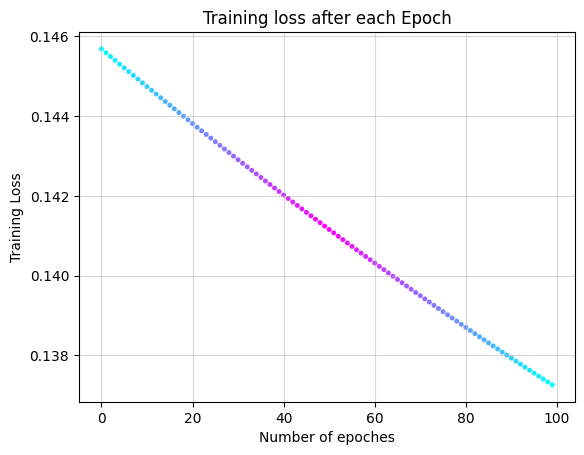

In [64]:
colors_1=cm.cool(np.linspace(0, 1, len(training_error)//2))
colors_2=cm.cool(np.linspace(1, 0, len(training_error)//2))
colors=np.concatenate([colors_1, colors_2])

plt.scatter(range(max_epoches),training_error, color=colors, s=6.5)
plt.xlabel("Number of epoches")
plt.ylabel("Training Loss")
plt.title("Training loss after each Epoch")
plt.grid(True, linestyle="-", alpha= 0.5)
plt.show()

# Question 2: Classification using the $k-$Nearest Neighbors Technique

We are given a Data which contains the data about numerus number of abalones. We are asked to make a set up which can be used to find the the age of a abalone whose length, diameter, height, Whole weigh, Shucked weight, Viscera weight and Shell weight are known. For that we have planned to use __K- nearest neighbours__ algorithm which is used for classification and regression. We do Classification here.

## Data Pre‐Processing and Cleaning

We directly read the dataset from the given url and load into a pandas DataFrame `abalone`.

In [65]:
url ="https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
abalone = pd.read_csv(url, header=None)
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


The age of a abalone is independent of it's sex. So we drop the `sex` column from our DataFrame. Which also help us doing the operations on the DataFrame easily with out need of removing that column explicitly.


In [66]:
column_names =["Sex", "Length", "Diameter", "Height", "Whole weigh",
"Shucked weight", "Viscera weight", "Shell weight", "Rings"]

abalone.columns=column_names
abalone= abalone.drop(columns=["Sex"])

abalone.head()

,Length,Diameter,Height,Whole weigh,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


##Training and Test Data

We divide the given data into two parts, one for training and the other for validation.

The Training data is used for train whereas, the validation data is used to check the performance of the model. The split is typically done randomly to ensure that both sets are representative of the entire dataset.

In [67]:
X_train, X_test, y_train, y_test =train_test_split(abalone.iloc[:,:7].values, abalone.iloc[:,7].values, test_size=0.3, random_state=333)

In [68]:
abalone.dtypes

,0
Length,float64
Diameter,float64
Height,float64
Whole weigh,float64
Shucked weight,float64
Viscera weight,float64
Shell weight,float64
Rings,int64


##Implementing the $k-$Nearest Neighbors Algorithm

We now define a function to implement the k-nearest neighbors (k-NN) algorithm for predicting the age of an abalone. The function follows these steps:

__Inputs:__

A 2D array representing the training dataset, excluding the age of the abalones.
A 1D array containing the ages corresponding to the training data.
A 1D array representing the features of a new abalone whose age needs to be predicted.
An integer k, specifying the number of nearest neighbors to consider.

__Computing Distances:__

The function calculates the distance between the new abalone's features and every row in the training dataset.
These distances are stored in an array named distances.

__Selecting Nearest Neighbors:__

The function identifies the k smallest distances.
It retrieves the corresponding ages from the training dataset, storing them in k_nn_labels.

__Determining the Predicted Age:__

The most frequently occurring age in k_nn_labels is chosen as the prediction.
If multiple ages appear with the same highest frequency, one is selected randomly.
The function then returns the predicted age of the new abalone.



In [69]:
def k_nn(X_train, y_train , new_data, k):
  distance=np.zeros(len(X_train))

  distance = LA.norm(X_train - new_data, axis=1)

  index_nn=distance.argsort()[:k]

  k_nn_labels=y_train[index_nn]

  #mode_value = np.bincount(k_nn).argmax()
  unique_labels, counts = np.unique(k_nn_labels, return_counts=True)
  mode_value = unique_labels[np.argmax(counts)]
  if np.sum(k_nn_labels == mode_value) == 1:
    np.random.seed(None)
    label = np.random.choice(k_nn_labels)
  else:
    label=mode_value
  return label

We are given a table on data of a new abalone whose age is to be predicted using the above function where the k value is given as 3.

In [77]:
new_abalone=np.array([0.569552,0.446407,0.154437,1.016849,0.439051,0.222526,0.291208])
predicted_age=k_nn(X_train,y_train,new_abalone,3)
print(predicted_age)

np.int64(11)

The predited age of the new abalone given is __11__

Now we find the predicted age of all the rows of data in `X_test` and find the __Mean Squared Error__ by using $$\text{MSE} = \frac{1}{M} \sum_{j=0}^{M-1} \left( \text{predicted_ages_test}[j] - y\_test[j] \right)^2$$

In [71]:
predicted_ages=np.zeros(len(y_test))
for i in range(len(y_test)):
  predicted_ages[i]=k_nn(X_train,y_train,X_test[i],3)
predicted_ages[:6]


array([7., 7., 7., 8., 7., 6.])

In [72]:
MSE = np.mean((predicted_ages - y_test) ** 2)

print(MSE)

8.149122807017545


##Tuning $k$ to Achieve Optimal Performance

We vary $k$ from $1$ to $50 $ and compute the MSE value for each $k$. We then Store the MSE values obtained in array `mse_values`. After that we generate a plot of k values on the x-axis and mse_values on the y-axis. From the plot we find the value of $k$ where the value of MSE is minimum.

In [73]:
k_values=np.arange(1,51)
mse_values = np.zeros(50)
predicted_ages_test=np.zeros(len(y_test))
for j in range(1,51):
  for i in range(len(y_test)):
    predicted_ages_test[i]=k_nn(X_train,y_train,X_test[i],j)
  mse_values[j-1]= np.mean((predicted_ages_test - y_test) ** 2)

In [74]:
mse_values

array([8.16028708, 8.68500797, 8.33971292, 7.30542265, 6.65311005,
       6.73285486, 6.97448166, 6.61483254, 6.58851675, 6.69059011,
       6.70733652, 6.61961722, 6.54625199, 6.63716108, 6.68500797,
       6.57814992, 6.61164274, 6.50717703, 6.51594896, 6.38118022,
       6.40909091, 6.42185008, 6.45933014, 6.56140351, 6.54625199,
       6.51674641, 6.5645933 , 6.47208931, 6.53508772, 6.49760766,
       6.47049442, 6.5199362 , 6.523126  , 6.52551834, 6.52551834,
       6.48325359, 6.55980861, 6.38755981, 6.37400319, 6.42105263,
       6.47926635, 6.4553429 , 6.60207337, 6.49282297, 6.61881978,
       6.47926635, 6.47767145, 6.48963317, 6.44178628, 6.4338118 ])

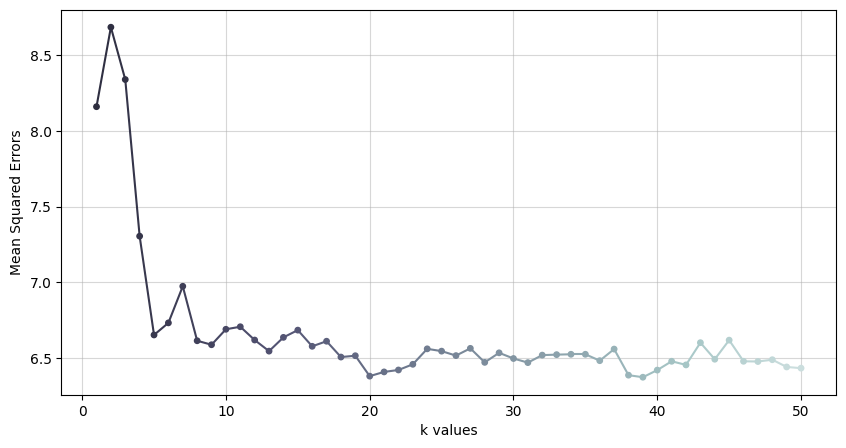

In [75]:
# Custom-made part begins
colors=cm.bone(np.linspace(0.2,0.85,len(k_values)))
plt.figure(figsize=(10, 5))
for i in range(1, len(k_values)):
     plt.plot(k_values[i-1:i+1], mse_values[i-1:i+1], color=colors[i], linewidth=1.5)
# Custom-made part ends

plt.scatter(k_values,mse_values,color=colors, zorder=7, s=15)
plt.xlabel("k values")
plt.ylabel("Mean Squared Errors")
plt.title("MSE vs k values")
plt.grid(True,linestyle="-",alpha=0.5)
plt.show()

In [76]:
min_mse_index=np.argmin(mse_values)
optimal_k=k_values[min_mse_index]
print(f"The minimum MSE value obtained is {min(mse_values)} at the most optimal k {optimal_k}")

The minimum MSE value obtained is 6.3740031897926634 at the most optimal k 39
